In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.1/605.1 kB 8.1 MB/s eta 0:00:00


In [6]:
d!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="a29KH4NKc0cSUk49WmeX")
project = rf.workspace("test-8mpcy").project("testing-ln0vr")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.144, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to testing-1 in yolov8:: 100%|██████████| 1708/1708 [00:00<00:00, 2824.29it/s]


In [7]:
from IPython.display import display, Image
from ultralytics import YOLO


#**Training**


In [8]:
!pwd

'/content'

In [9]:
%cd {Home}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

[Errno 2] No such file or directory: '{Home}'
/content
100% 21.5M/21.5M [00:01<00:00, 18.6MB/s]
Ultralytics YOLOv8.0.144 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/testing-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_

/content


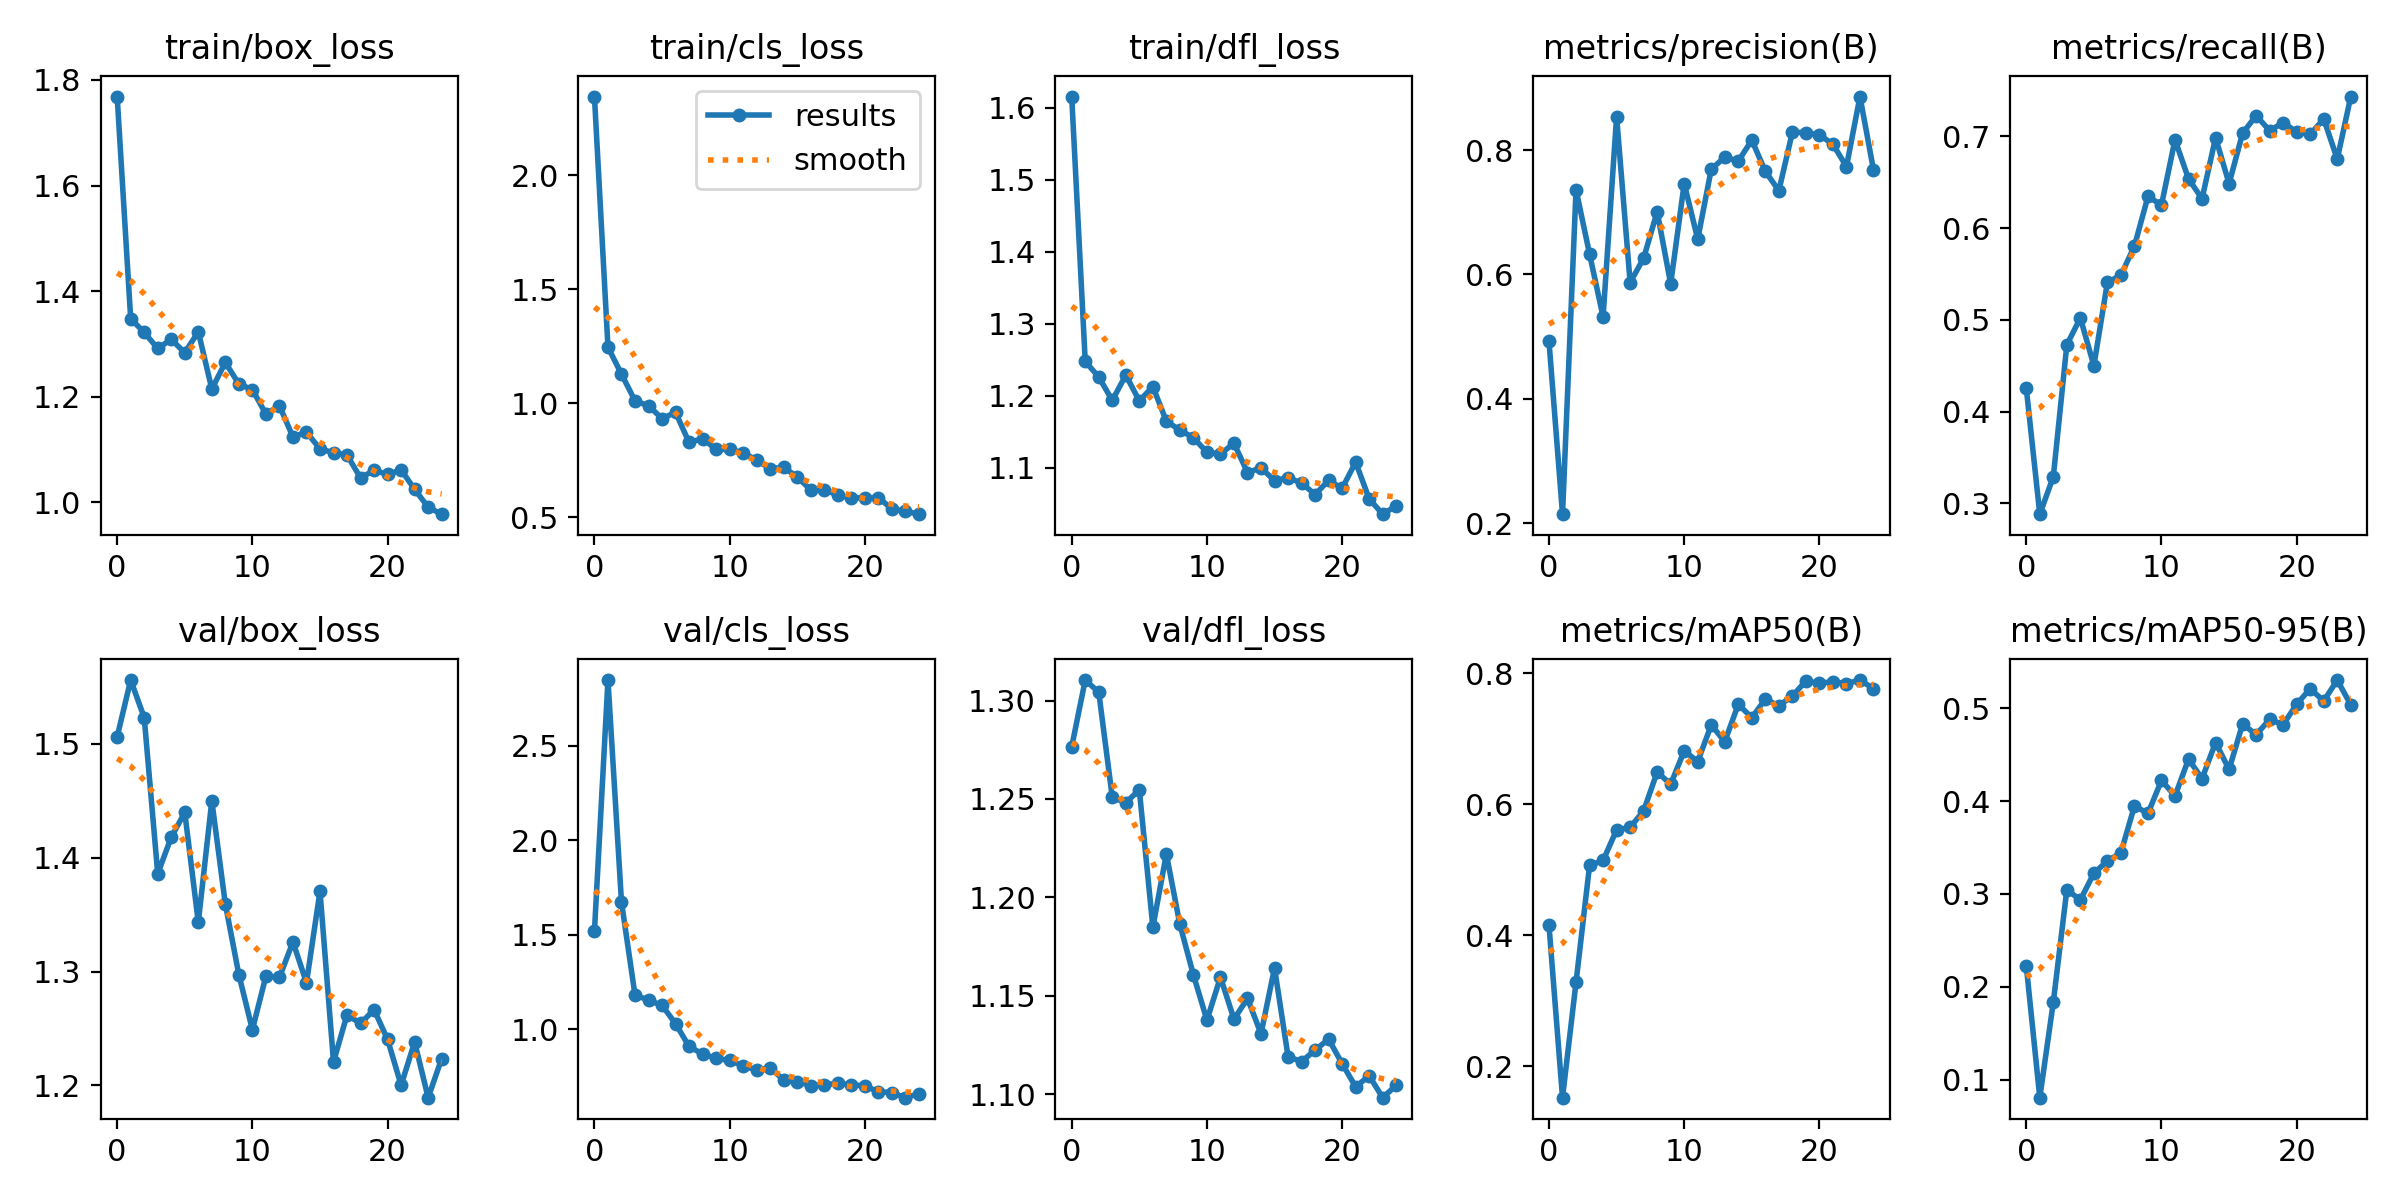

In [10]:
%cd /content
Image(filename=f'/content/runs/detect/train/results.png', width=600)

# **Validate**

In [13]:
%cd /content
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test  save = true

/content
Ultralytics YOLOv8.0.144 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients

image 1/3 /content/testing-1/test/WIN_20230729_20_34_52_Pro.jpg: 384x640 1 without_mask, 94.6ms
image 2/3 /content/testing-1/test/WIN_20230729_20_35_05_Pro.jpg: 384x640 1 with_mask, 11.1ms
image 3/3 /content/testing-1/test/WIN_20230729_20_35_09_Pro.jpg: 384x640 1 mask_weared_incorrect, 1 without_mask, 11.0ms
Speed: 1.6ms preprocess, 38.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2


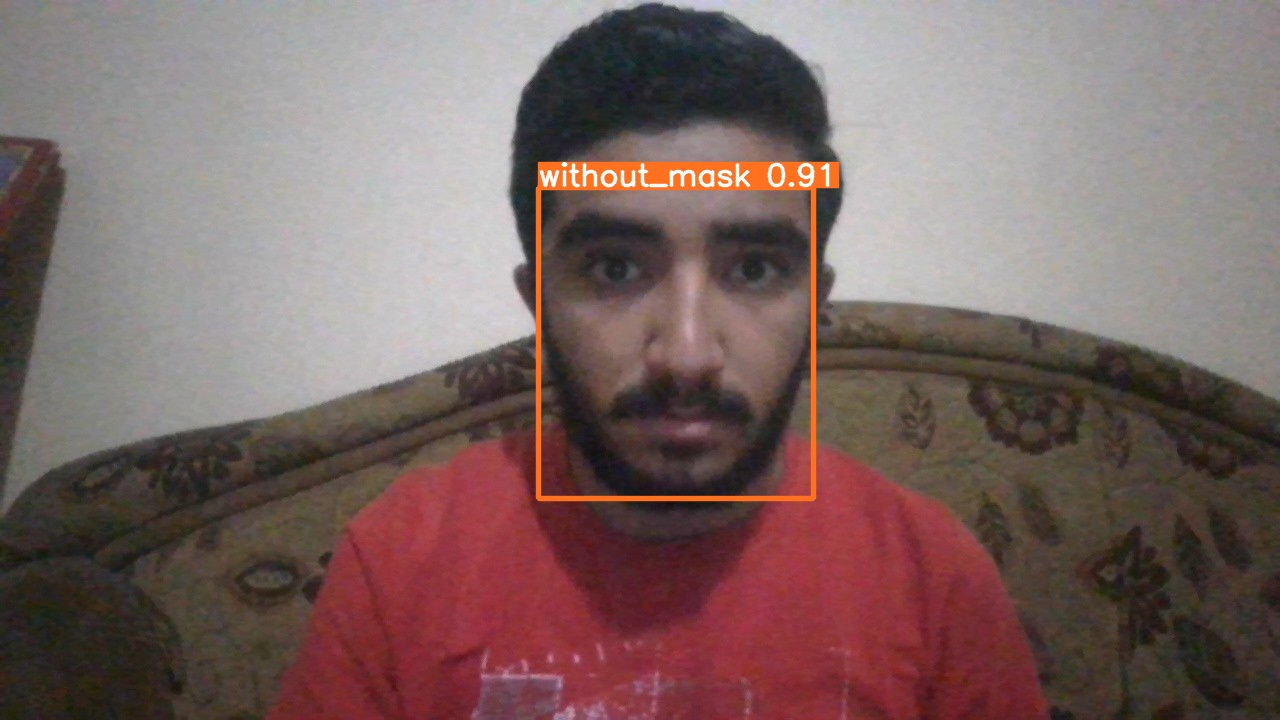

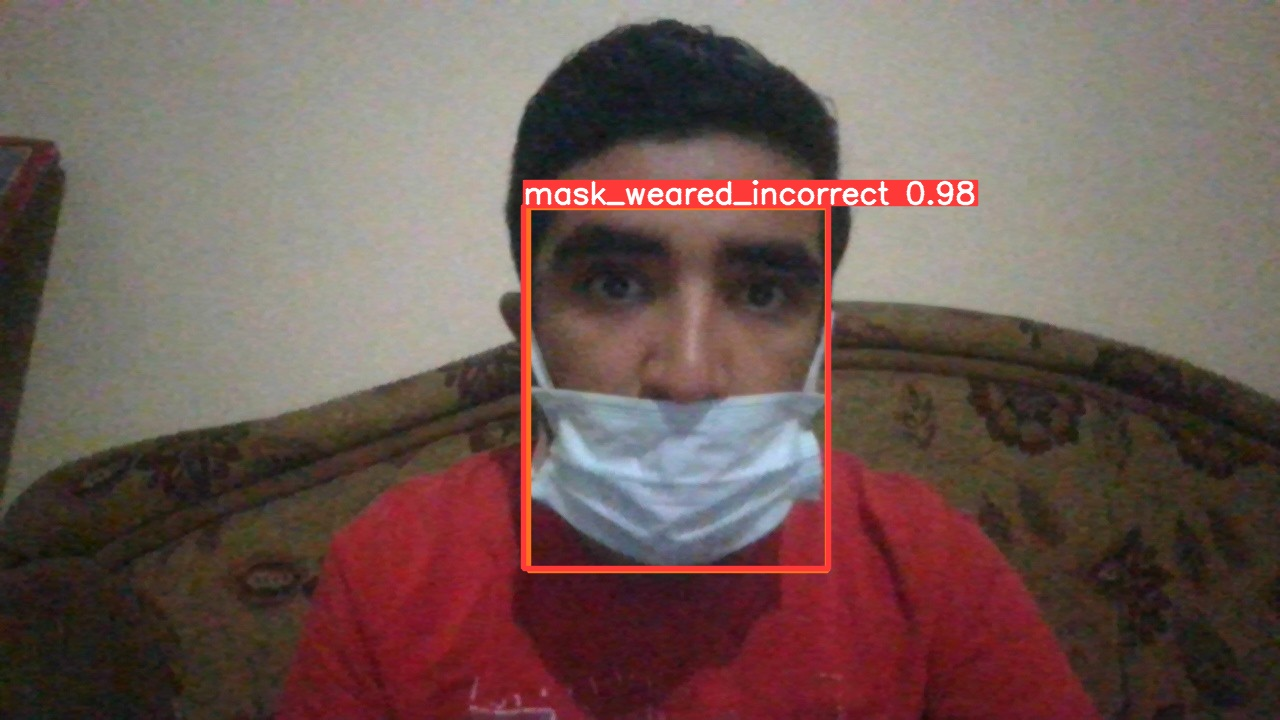

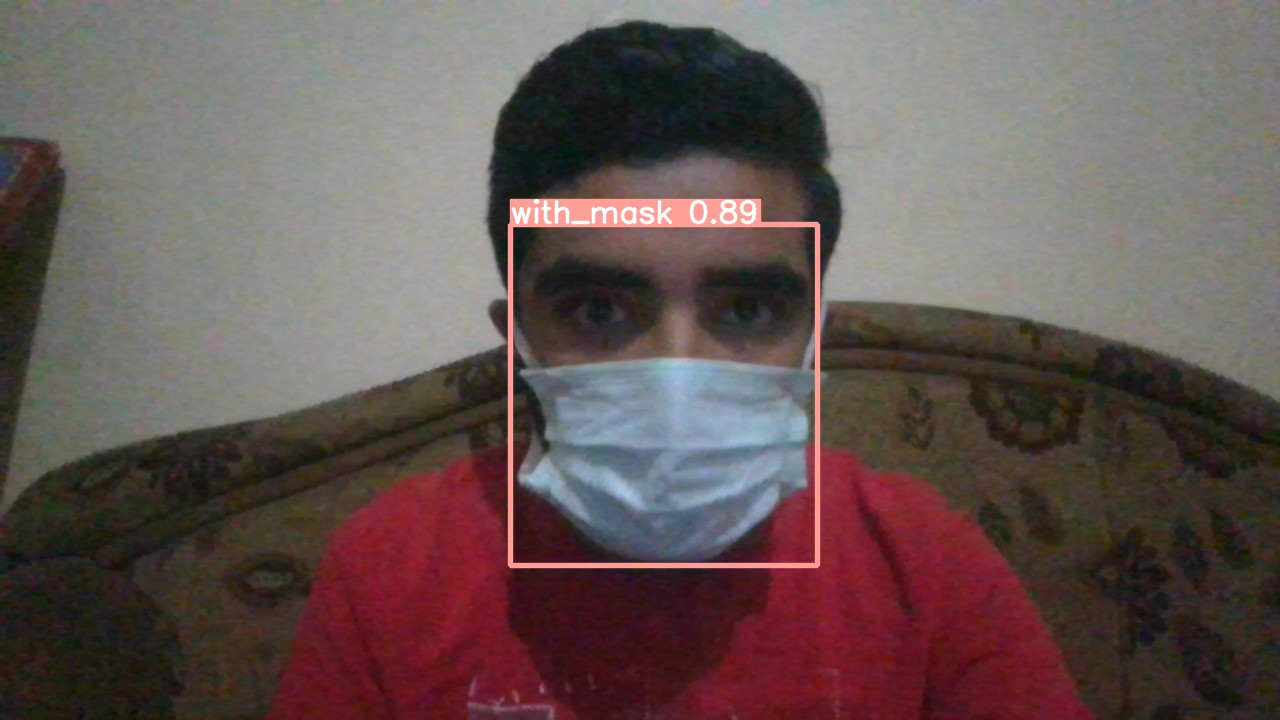

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict2/*.jpg')[:4]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [15]:
%cd /content
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images  save = true

/content
Ultralytics YOLOv8.0.144 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients

image 1/85 /content/testing-1/test/images/maksssksksss109_png.rf.602ffb8326e24a3400a37e2a2c0f1c07.jpg: 640x640 1 with_mask, 16.3ms
image 2/85 /content/testing-1/test/images/maksssksksss111_png.rf.8145c7d79b9ecc31222b63de80551ae1.jpg: 640x640 8 with_masks, 2 without_masks, 16.3ms
image 3/85 /content/testing-1/test/images/maksssksksss124_png.rf.0633bde846db45c695026d58fe4d73ef.jpg: 640x640 3 with_masks, 2 without_masks, 16.5ms
image 4/85 /content/testing-1/test/images/maksssksksss125_png.rf.86e027035c5cfeb95b70973d4ea6642c.jpg: 640x640 1 without_mask, 16.2ms
image 5/85 /content/testing-1/test/images/maksssksksss129_png.rf.5cde608ee64da0dfb75b91ab72f1c1ad.jpg: 640x640 1 with_mask, 2 without_masks, 16.2ms
image 6/85 /content/testing-1/test/images/maksssksksss132_png.rf.cbc6539638083adf7f5d85d35c34a1f9.jpg: 640x640 1 mask_weared

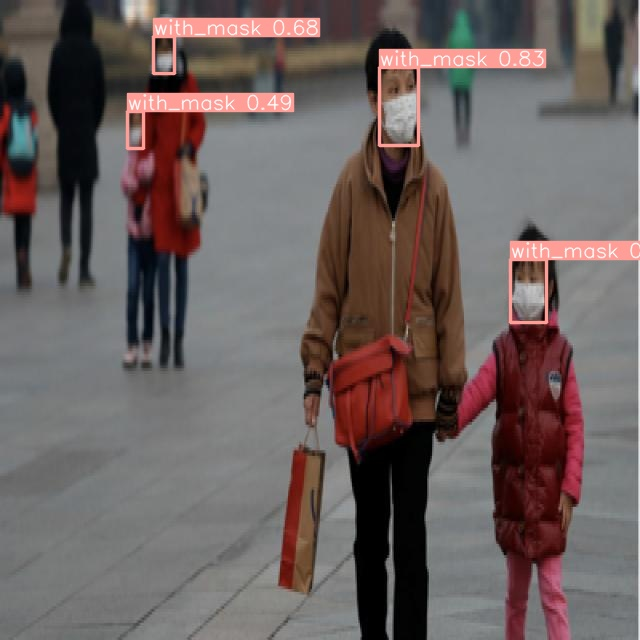

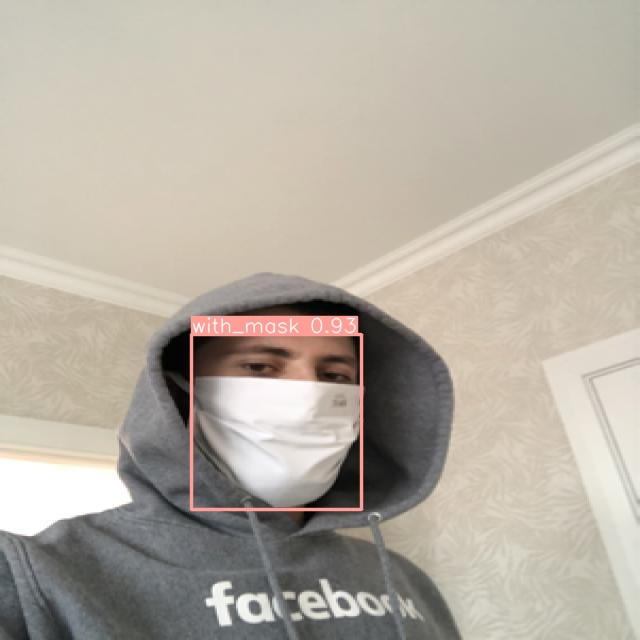

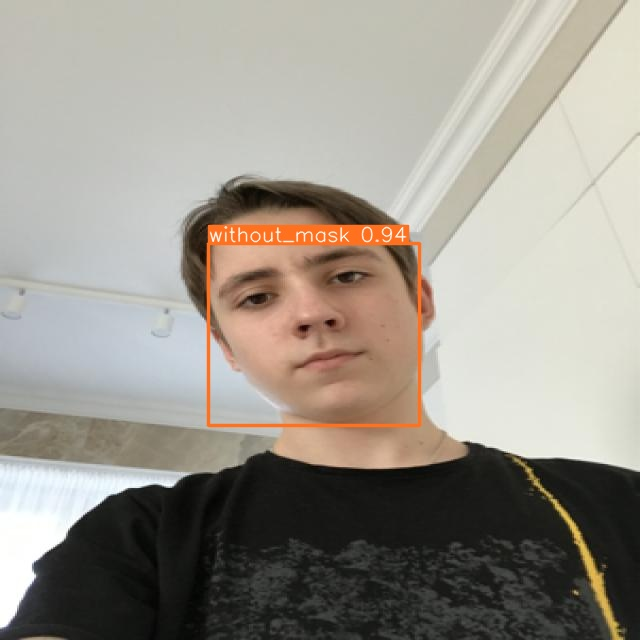

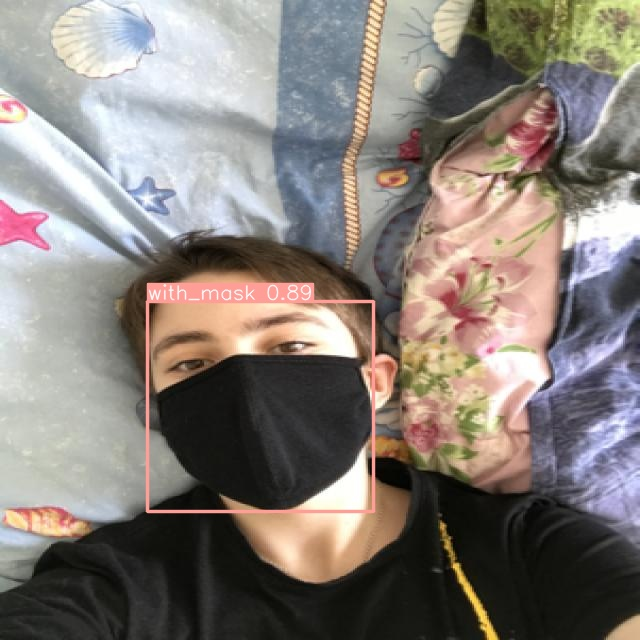

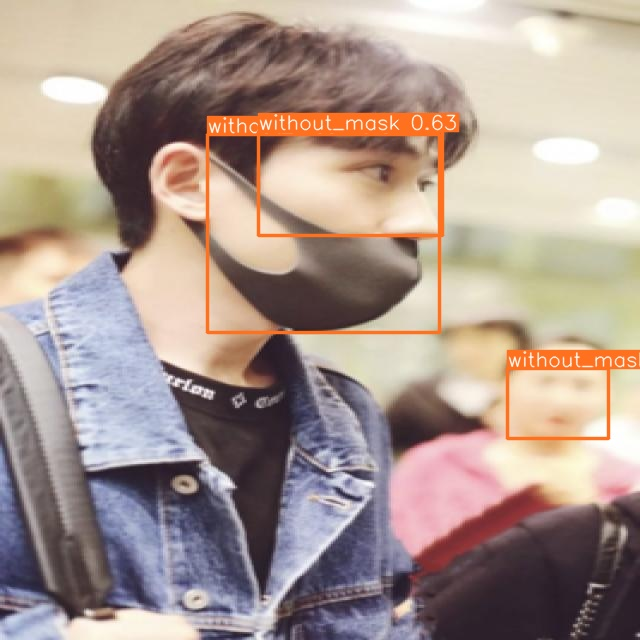

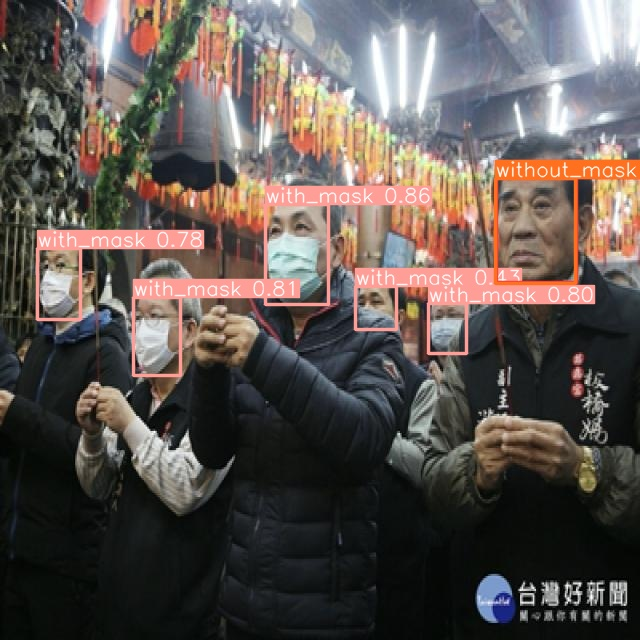

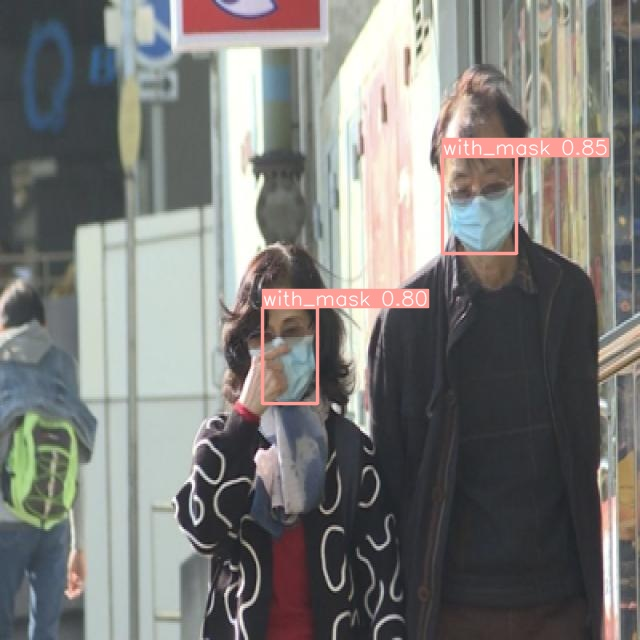

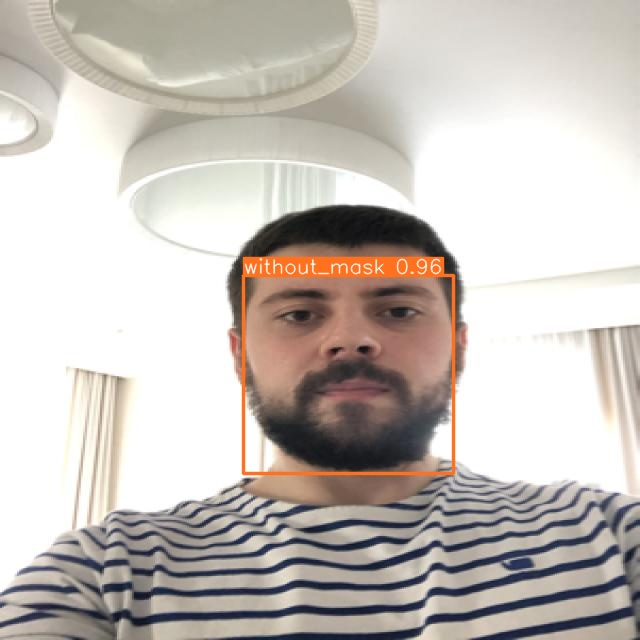

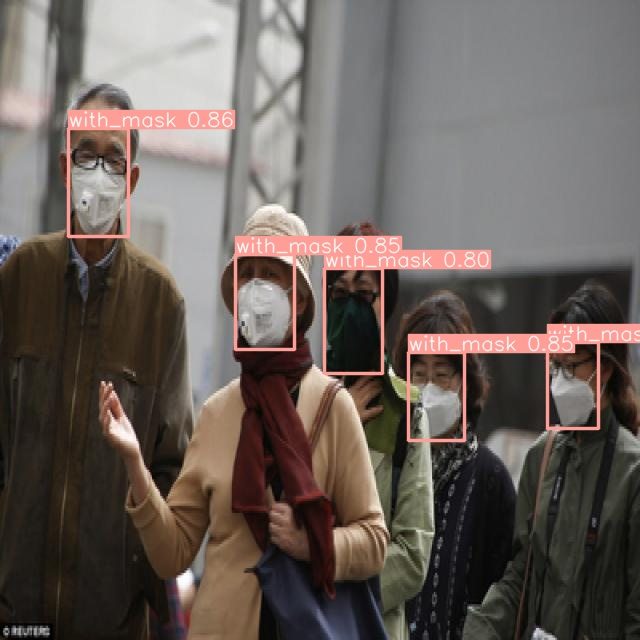

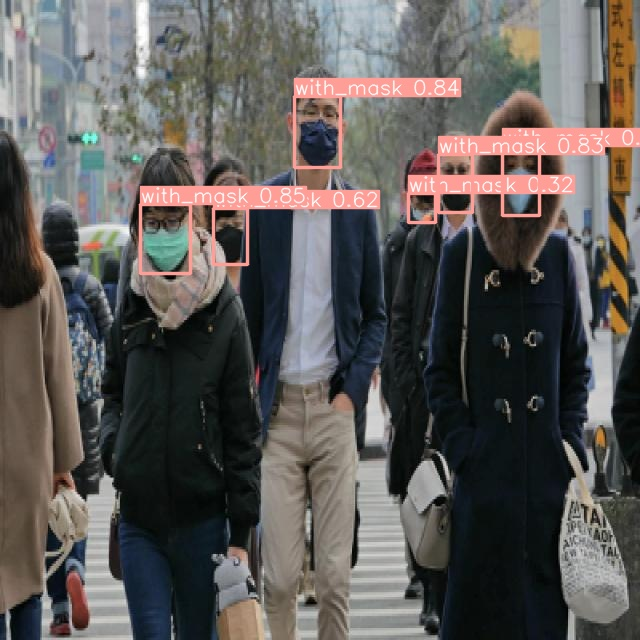

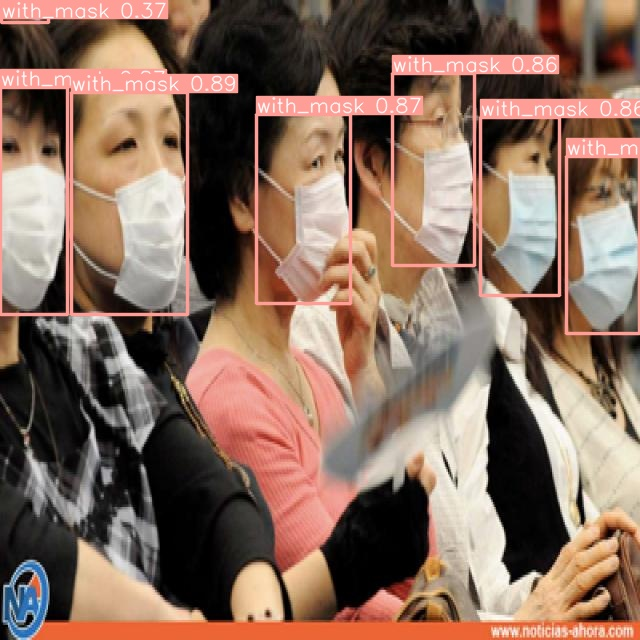

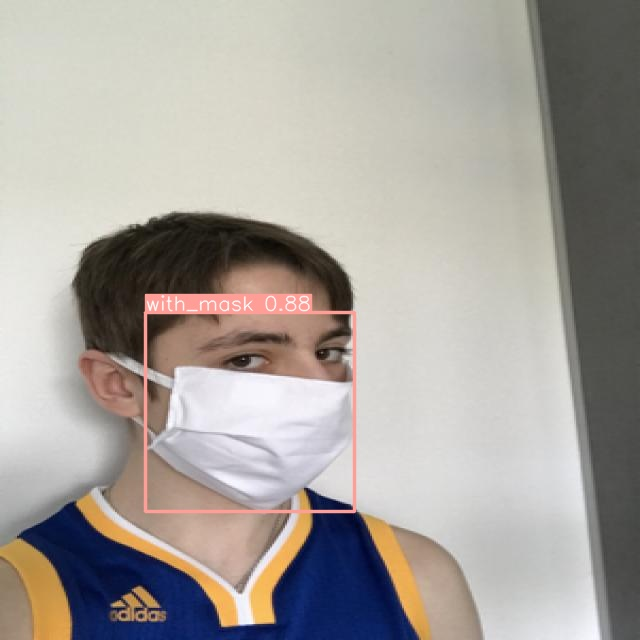

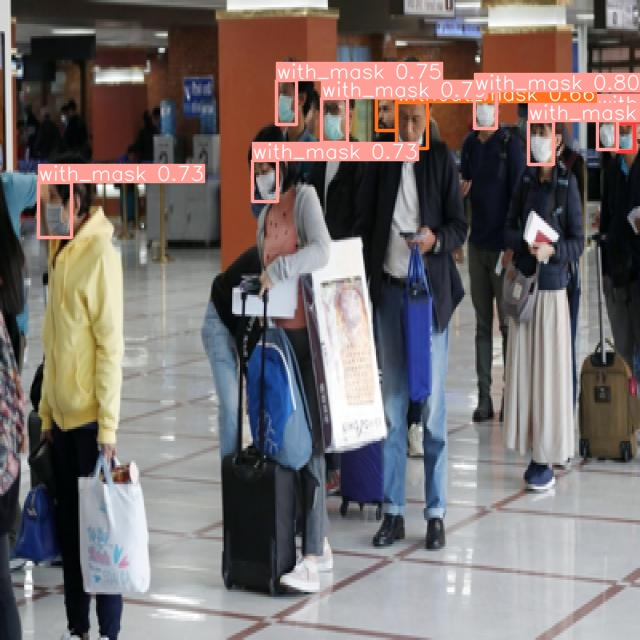

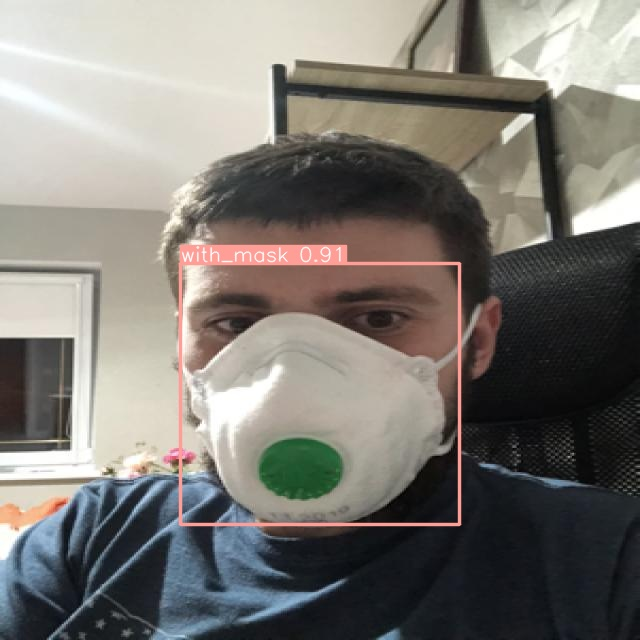

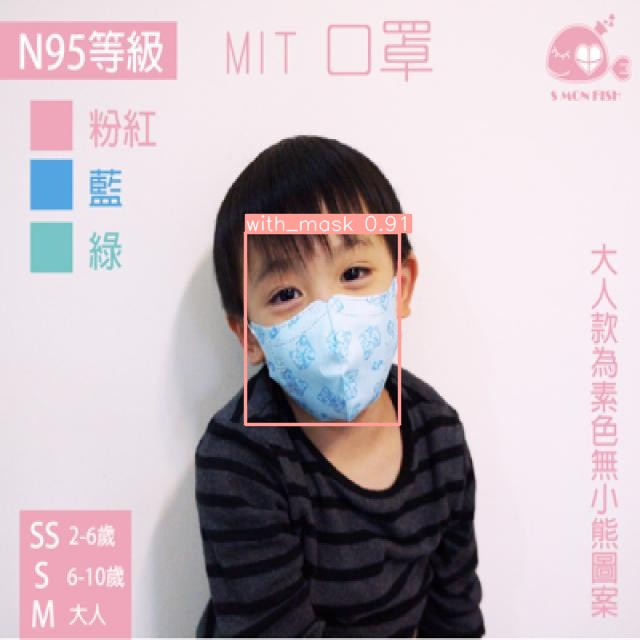

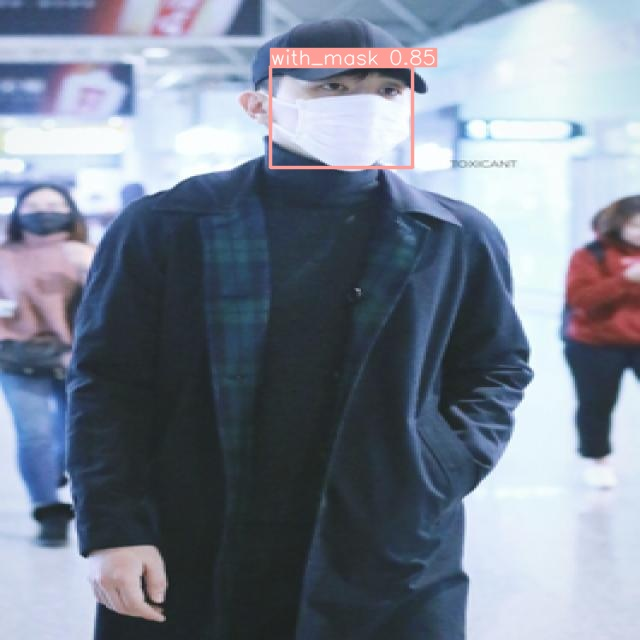

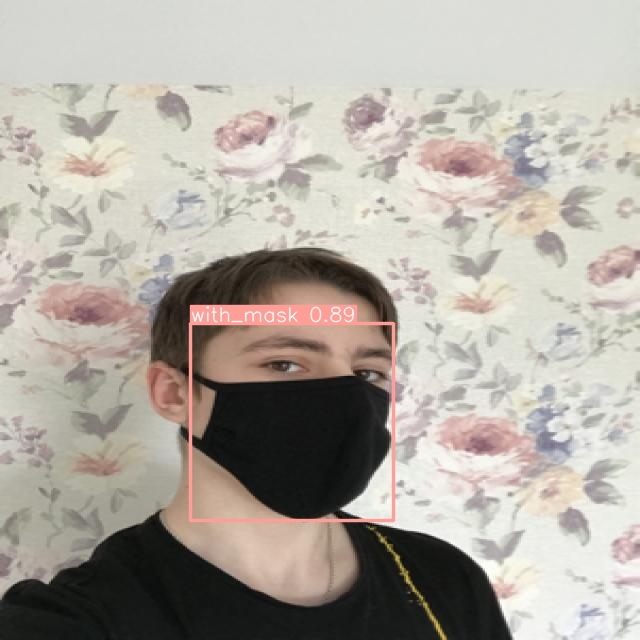

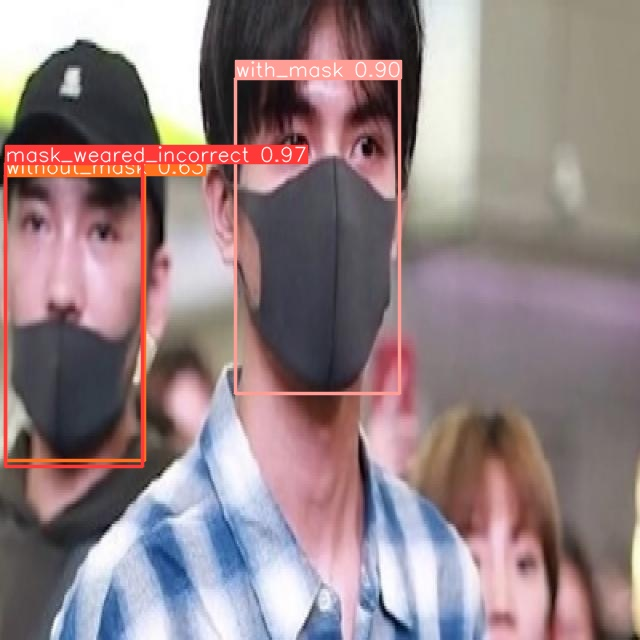

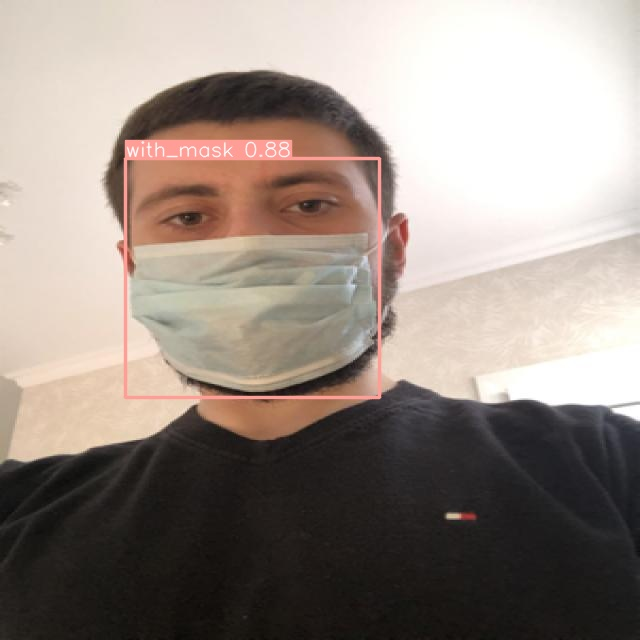

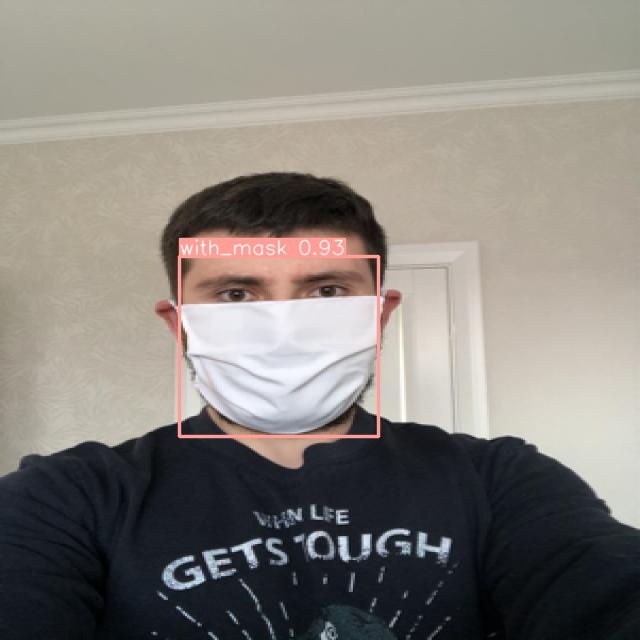

In [18]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict3/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))
      print("\n")